<a href="https://colab.research.google.com/github/Manujk-123/Marvel-Task-Level-1/blob/main/Copy_of_task_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving revenue table.jpg to revenue table (1).jpg
[2025/03/31 05:55:11] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_ima

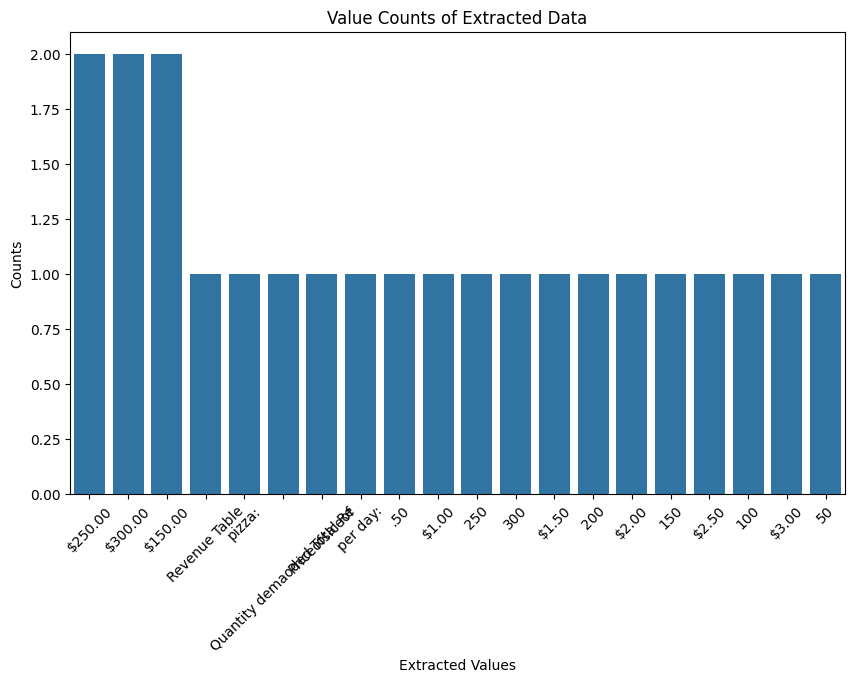

In [ ]:
from google.colab import files
from paddleocr import PaddleOCR
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get the uploaded file name

# Check if image exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Error: The file '{image_path}' does not exist.")

# Initialize OCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Read Image
image = cv2.imread(image_path)

# Perform OCR
result = ocr.ocr(image_path, cls=True)
extracted_data = []

for line in result:
    for word_info in line:
        extracted_data.append(word_info[1][0])

# Convert to DataFrame
df = pd.DataFrame(extracted_data, columns=['Extracted Text'])
summary_statistics = df.describe()
value_counts = df['Extracted Text'].value_counts()

# Print Results
print("Summary Statistics:")
print(summary_statistics)
print("\nValue Counts:")
print(value_counts)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title('Value Counts of Extracted Data')
plt.xlabel('Extracted Values')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()